# DSCI 617 – Group Project

## Lahman Baseball Database
**Felix Asare**

Importing Library

In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, expr
from pyspark.sql import SparkSession

spark= SparkSession.builder.getOrCreate()

### A.1 – Load Data

Loading datasets for Prople.csv,  batting, teams, and franchises. 

In [0]:
# Create People.csv data
people = (
    spark.read
    .option("header", True)  
    .option("inferSchema", True)
    .option("delimiter", ",")     
    .csv('/FileStore/tables/lahman/People.csv')    
)

people.printSchema()


root
 |-- playerID: string (nullable = true)
 |-- birthYear: integer (nullable = true)
 |-- birthMonth: integer (nullable = true)
 |-- birthDay: integer (nullable = true)
 |-- birthCountry: string (nullable = true)
 |-- birthState: string (nullable = true)
 |-- birthCity: string (nullable = true)
 |-- deathYear: integer (nullable = true)
 |-- deathMonth: integer (nullable = true)
 |-- deathDay: integer (nullable = true)
 |-- deathCountry: string (nullable = true)
 |-- deathState: string (nullable = true)
 |-- deathCity: string (nullable = true)
 |-- nameFirst: string (nullable = true)
 |-- nameLast: string (nullable = true)
 |-- nameGiven: string (nullable = true)
 |-- weight: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- bats: string (nullable = true)
 |-- throws: string (nullable = true)
 |-- debut: date (nullable = true)
 |-- finalGame: date (nullable = true)
 |-- retroID: string (nullable = true)
 |-- bbrefID: string (nullable = true)



In [0]:
# Batting data
batting = (
    spark.read
    .option("header", True)  
    .option("inferSchema", True)
    .option("delimiter", ",")     
    .csv('/FileStore/tables/lahman/Batting.csv')    
)

batting.printSchema()

root
 |-- playerID: string (nullable = true)
 |-- yearID: integer (nullable = true)
 |-- stint: integer (nullable = true)
 |-- teamID: string (nullable = true)
 |-- lgID: string (nullable = true)
 |-- G: integer (nullable = true)
 |-- AB: integer (nullable = true)
 |-- R: integer (nullable = true)
 |-- H: integer (nullable = true)
 |-- 2B: integer (nullable = true)
 |-- 3B: integer (nullable = true)
 |-- HR: integer (nullable = true)
 |-- RBI: integer (nullable = true)
 |-- SB: integer (nullable = true)
 |-- CS: integer (nullable = true)
 |-- BB: integer (nullable = true)
 |-- SO: integer (nullable = true)
 |-- IBB: integer (nullable = true)
 |-- HBP: integer (nullable = true)
 |-- SH: integer (nullable = true)
 |-- SF: integer (nullable = true)
 |-- GIDP: integer (nullable = true)



In [0]:
# teams data
teams = (
    spark.read
    .option("header", True)  
    .option("inferSchema", True)
    .option("delimiter", ",")     
    .csv('/FileStore/tables/lahman/Teams.csv')    
)

teams.printSchema()

root
 |-- yearID: integer (nullable = true)
 |-- lgID: string (nullable = true)
 |-- teamID: string (nullable = true)
 |-- franchID: string (nullable = true)
 |-- divID: string (nullable = true)
 |-- Rank: integer (nullable = true)
 |-- G: integer (nullable = true)
 |-- Ghome: integer (nullable = true)
 |-- W: integer (nullable = true)
 |-- L: integer (nullable = true)
 |-- DivWin: string (nullable = true)
 |-- WCWin: string (nullable = true)
 |-- LgWin: string (nullable = true)
 |-- WSWin: string (nullable = true)
 |-- R: integer (nullable = true)
 |-- AB: integer (nullable = true)
 |-- H: integer (nullable = true)
 |-- 2B: integer (nullable = true)
 |-- 3B: integer (nullable = true)
 |-- HR: integer (nullable = true)
 |-- BB: integer (nullable = true)
 |-- SO: integer (nullable = true)
 |-- SB: integer (nullable = true)
 |-- CS: integer (nullable = true)
 |-- HBP: integer (nullable = true)
 |-- SF: integer (nullable = true)
 |-- RA: integer (nullable = true)
 |-- ER: integer (nullabl

In [0]:
# franchises data
franchises = (
    spark.read
    .option("header", True)  
    .option("inferSchema", True)
    .option("delimiter", ",")     
    .csv('/FileStore/tables/lahman/TeamsFranchises.csv')    
)

franchises.printSchema()

root
 |-- franchID: string (nullable = true)
 |-- franchName: string (nullable = true)
 |-- active: string (nullable = true)
 |-- NAassoc: string (nullable = true)



In [0]:
# Count rows in each table
print(f"Number of records in people:     {teams.count()}")
print(f"Number of records in batting:    {batting.count()}")
print(f"Number of records in teams:      {teams.count()}")
print(f"Number of records in franchises: {franchises.count()}")



Number of records in people:     2955
Number of records in batting:    108789
Number of records in teams:      2955
Number of records in franchises: 120


### A.2 – The People Table

Exploring the people table

In [0]:
# Print people table column
print(people.columns)

['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']


In [0]:
# Select playerID, nameFirst, nameLast, weight, and height from people table
people = people.select("playerID", "nameFirst", "nameLast", "weight", "height")

# Print first 5 rows
people.show(5)

+---------+---------+--------+------+------+
| playerID|nameFirst|nameLast|weight|height|
+---------+---------+--------+------+------+
|aardsda01|    David| Aardsma|   215|    75|
|aaronha01|     Hank|   Aaron|   180|    72|
|aaronto01|   Tommie|   Aaron|   190|    75|
| aasedo01|      Don|    Aase|   190|    75|
| abadan01|     Andy|    Abad|   184|    73|
+---------+---------+--------+------+------+
only showing top 5 rows



In [0]:
# Calculate missing values
missing_records = people.filter(
    col("playerID").isNull() | 
    col("nameFirst").isNull() | 
    col("nameLast").isNull() | 
    col("weight").isNull() | 
    col("height").isNull()
)

# Display the number of records with missing values
print(f"Number of records with missing values: {missing_records.count()}")

Number of records with missing values: 872


In [0]:
from pyspark.sql.functions import sum

# Calculate the number of missing (null) values for each column
missing_values = people.select(
    [sum(col(c).isNull().cast("int")).alias(c) for c in people.columns]
)

# Display the results
missing_values.show()

+--------+---------+--------+------+------+
|playerID|nameFirst|nameLast|weight|height|
+--------+---------+--------+------+------+
|       0|       37|       0|   816|   736|
+--------+---------+--------+------+------+



### A.3 – The Batting Table

Exploring the batting table

In [0]:
# Print batting column names
print(batting.columns)

['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']


In [0]:
#Display first 5 rows
batting.show(5)

+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB| HBP|  SH|  SF|GIDP|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|NULL|NULL|NULL|NULL|   0|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|NULL|NULL|NULL|NULL|   0|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|NULL|NULL|NULL|NULL|   1|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|NULL|NULL|NULL|NULL|   0|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|  2|  1|NULL|NULL|NULL|NULL|   0|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
only showi

In [0]:
missing_batting = batting.filter(
    col("playerID").isNull() | 
    col("yearID").isNull() | 
    col("stint").isNull() | 
    col("teamID").isNull() | 
    col("lgID").isNull() | 
    col("G").isNull() | 
    col("AB").isNull() | 
    col("R").isNull() | 
    col("H").isNull() | 
    col("2B").isNull() | 
    col("3B").isNull() | 
    col("HR").isNull() | 
    col("RBI").isNull() | 
    col("SB").isNull() | 
    col("CS").isNull() | 
    col("BB").isNull() | 
    col("SO").isNull() | 
    col("IBB").isNull() | 
    col("HBP").isNull() | 
    col("SH").isNull() | 
    col("SF").isNull() | 
    col("GIDP").isNull()
)

missing_count_batting = missing_batting.count()

# Display the number of records with missing values
print(f"Number of records with missing values in batting: {missing_count_batting}")

Number of records with missing values in batting: 36679


In [0]:
batting_missing_values = batting.select(
    [sum(col(c).isNull().cast("int")).alias(c) for c in batting.columns]
)

batting_missing_values.show(truncate=False)

+--------+------+-----+------+----+---+---+---+---+---+---+---+---+----+-----+---+----+-----+----+----+-----+-----+
|playerID|yearID|stint|teamID|lgID|G  |AB |R  |H  |2B |3B |HR |RBI|SB  |CS   |BB |SO  |IBB  |HBP |SH  |SF   |GIDP |
+--------+------+-----+------+----+---+---+---+---+---+---+---+---+----+-----+---+----+-----+----+----+-----+-----+
|0       |0     |0    |0     |0   |0  |0  |0  |0  |0  |0  |0  |756|2368|23541|0  |2100|36650|2816|6068|36103|25441|
+--------+------+-----+------+----+---+---+---+---+---+---+---+---+----+-----+---+----+-----+----+----+-----+-----+



In [0]:
# Filling batting missing values
batting = batting.fillna(0)

# Display first 5 rows of the updated dataset
batting.show(5)


+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO|IBB|HBP| SH| SF|GIDP|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|   0|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|  0|  0|  0|  0|   0|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|  0|  0|  0|  0|   1|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|  0|  0|  0|  0|   0|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|  2|  1|  0|  0|  0|  0|   0|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
only showing top 5 rows



### A.4 – The Teams Table

Exploring Teams data

In [0]:
# Print teams columns
print(teams.columns)

['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']


In [0]:
# yearID, name, teamID, franchID, and lgID columns
teams.select("yearID", "name", "teamID", "franchID", "lgID")
teams.show(5, truncate=False)

+------+----+------+--------+-----+----+---+-----+---+---+------+-----+-----+-----+---+----+---+---+---+---+---+---+---+---+----+----+---+---+----+---+---+---+------+---+---+---+---+---+---+-----+-----------------------+----------------------------+----------+---+---+--------+--------------+-----------+
|yearID|lgID|teamID|franchID|divID|Rank|G  |Ghome|W  |L  |DivWin|WCWin|LgWin|WSWin|R  |AB  |H  |2B |3B |HR |BB |SO |SB |CS |HBP |SF  |RA |ER |ERA |CG |SHO|SV |IPouts|HA |HRA|BBA|SOA|E  |DP |FP   |name                   |park                        |attendance|BPF|PPF|teamIDBR|teamIDlahman45|teamIDretro|
+------+----+------+--------+-----+----+---+-----+---+---+------+-----+-----+-----+---+----+---+---+---+---+---+---+---+---+----+----+---+---+----+---+---+---+------+---+---+---+---+---+---+-----+-----------------------+----------------------------+----------+---+---+--------+--------------+-----------+
|1871  |NA  |BS1   |BNA     |NULL |3   |31 |NULL |20 |10 |NULL  |NULL |N    |NULL |40

In [0]:
# Calculate missing values for teams table
team_missing_values = teams.select(
    [(sum(col(c).isNull().cast("int")).alias(c)) for c in teams.columns]
)
team_missing_values.show()


+------+----+------+--------+-----+----+---+-----+---+---+------+-----+-----+-----+---+---+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+------+---+---+---+---+---+---+---+----+----+----------+---+---+--------+--------------+-----------+
|yearID|lgID|teamID|franchID|divID|Rank|  G|Ghome|  W|  L|DivWin|WCWin|LgWin|WSWin|  R| AB|  H| 2B| 3B| HR| BB| SO| SB| CS| HBP|  SF| RA| ER|ERA| CG|SHO| SV|IPouts| HA|HRA|BBA|SOA|  E| DP| FP|name|park|attendance|BPF|PPF|teamIDBR|teamIDlahman45|teamIDretro|
+------+----+------+--------+-----+----+---+-----+---+---+------+-----+-----+-----+---+---+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+------+---+---+---+---+---+---+---+----+----+----------+---+---+--------+--------------+-----------+
|     0|   0|     0|       0| 1517|   0|  0|  399|  0|  0|  1545| 2181|   28|  357|  0|  0|  0|  0|  0|  0|  1| 16|126|832|1158|1541|  0|  0|  0|  0|  0|  0|     0|  0|  0|  0|  0|  0|  0|  0|   0|  34|       279|  0|  0|     

### A.5 – The Franchises Table

Exploring the Franchises table

In [0]:
# Frachises columns
franchises.columns

['franchID', 'franchName', 'active', 'NAassoc']

In [0]:
# Display first 5 rows
franchises.show(5, truncate=False)

+--------+-----------------------------+------+-------+
|franchID|franchName                   |active|NAassoc|
+--------+-----------------------------+------+-------+
|ALT     |Altoona Mountain City        |N     |NULL   |
|ANA     |Los Angeles Angels of Anaheim|Y     |NULL   |
|ARI     |Arizona Diamondbacks         |Y     |NULL   |
|ATH     |Philadelphia Athletics       |N     |PNA    |
|ATL     |Atlanta Braves               |Y     |BNA    |
+--------+-----------------------------+------+-------+
only showing top 5 rows



In [0]:
# Franchise missing values
missing_records_franchises = franchises.filter(
    (franchises.franchID.isNull()) |
    (franchises.franchName.isNull()) |
    (franchises.active.isNull()) |
    (franchises.NAassoc.isNull())
)

# Count and display the number of records with missing values
missing_count_franchises = missing_records_franchises.count()
print(f"Number of records in franchises with missing values: {missing_count_franchises}")

Number of records in franchises with missing values: 108


In [0]:
# Records with missing values
missing_counts = {}
for column in franchises.columns:
    missing_count = franchises.filter(franchises[column].isNull()).count()
    missing_counts[column] = missing_count

# Display results
for column, count in missing_counts.items():
    print(f"Number of missing values in {column}: {count}")

Number of missing values in franchID: 0
Number of missing values in franchName: 0
Number of missing values in active: 0
Number of missing values in NAassoc: 108


## Section B – Teams and Franchises

### B.1 – Number of Franchises by Year

Determining the number of MLB franchises that existed each year.

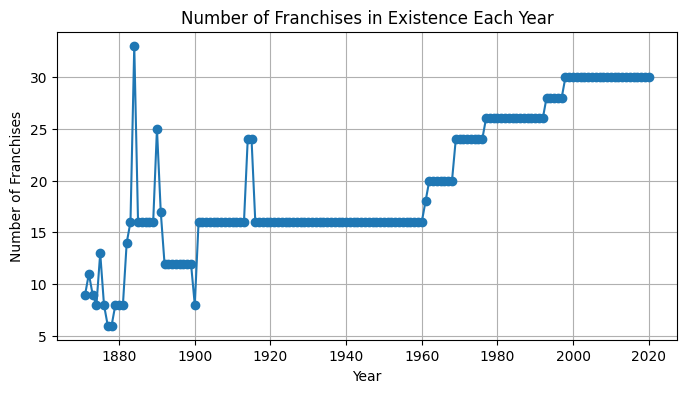

In [0]:
# Group by yearID, calculate distinct franchID, and sort by yearID
teams_distinct_pandas = (
    teams.groupBy('yearID')  
    .agg(expr('COUNT(DISTINCT franchID)').alias('distinct_franchID')) 
    .orderBy('yearID') 
    .toPandas() 
)

# Plot the Dataframe results
plt.figure(figsize=[8, 4])

# Plot the data
plt.plot(teams_distinct_pandas['yearID'], teams_distinct_pandas['distinct_franchID'], marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Franchises')
plt.title('Number of Franchises in Existence Each Year')

# Adding grid
plt.grid(True)

# Display the plot
plt.show()


### B.2 – Franchise Statistics

Calculating statistics for each franchise in the dataset

In [0]:
# Calculating franchise statistics
franchise_summary = (
    teams.groupBy('franchID')
    .agg(
        expr('COUNT(DISTINCT name)').alias('num_names'),
        expr('MIN(yearID)').alias('first_year'),
        expr('MAX(yearID)').alias('last_year'),
        expr('COUNT(DISTINCT yearID)').alias('seasons'),
        expr('SUM(W)').alias('W'),
        expr('SUM(L)').alias('L')
    )
)

# Adding WL ratio column
franchise_summary = franchise_summary.withColumn(
    "WL_ratio", expr("round(W / L, 4)")
)

# Join the franchise table
franchise_summary = franchise_summary.join(franchises, on='franchID')

# Displaying the results
franchise_summary.show(5, truncate=False)

+--------+---------+----------+---------+-------+----+----+--------+-------------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|W   |L   |WL_ratio|franchName               |active|NAassoc|
+--------+---------+----------+---------+-------+----+----+--------+-------------------------+------+-------+
|PHA     |1        |1882      |1890     |9      |560 |498 |1.1245  |Philadelphia Athletics   |N     |NULL   |
|NNA     |1        |1871      |1875     |5      |151 |122 |1.2377  |New York Mutuals         |NA    |NYU    |
|NYM     |1        |1962      |2020     |59     |4474|4842|0.924   |New York Mets            |Y     |NULL   |
|SNA     |1        |1875      |1875     |1      |39  |29  |1.3448  |St. Louis Brown Stockings|NA    |SBS    |
|BRA     |1        |1872      |1875     |4      |50  |140 |0.3571  |Brooklyn Atlantics       |NA    |NULL   |
+--------+---------+----------+---------+-------+----+----+--------+-------------------------+------+-------+
only showi

### B.3 – Franchises with the Most Names

Determining the greatest number of names that have been used by any one franchise.

In [0]:
# Top 10 most used franchises names
franchise_summary.orderBy(expr('num_names').desc()).show(10, truncate=False)

+--------+---------+----------+---------+-------+-----+-----+--------+-----------------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|W    |L    |WL_ratio|franchName                   |active|NAassoc|
+--------+---------+----------+---------+-------+-----+-----+--------+-----------------------------+------+-------+
|LAD     |8        |1884      |2020     |137    |11017|9835 |1.1202  |Los Angeles Dodgers          |Y     |NULL   |
|ATL     |8        |1876      |2020     |145    |10732|10684|1.0045  |Atlanta Braves               |Y     |BNA    |
|CHC     |4        |1876      |2020     |145    |11016|10430|1.0562  |Chicago Cubs                 |Y     |CNA    |
|ANA     |4        |1961      |2020     |60     |4735 |4753 |0.9962  |Los Angeles Angels of Anaheim|Y     |NULL   |
|CLE     |4        |1901      |2020     |120    |9512 |9062 |1.0497  |Cleveland Indians            |Y     |NULL   |
|STL     |4        |1882      |2020     |139    |10948|10091|1.0849  |St

In [0]:
# Find the franchID with the greatest number of names
max_num_names_franchID = (
    franchise_summary.orderBy(expr('num_names').desc())
    .select('franchID')
    .first()['franchID']
)

# Filter the teams DataFrame for this franchID
filtered_teams = teams.filter(teams.franchID == max_num_names_franchID)

# Group by franchID and name, and aggregate to find first_year and last_year
grouped_teams = (
    filtered_teams.groupBy('franchID', 'name')
    .agg(expr('MIN(yearID) AS first_year'),
         expr('MAX(yearID) AS last_year'))
)

# Displaying sorted results
grouped_teams.orderBy('first_year').show(truncate=False)

+--------+--------------------+----------+---------+
|franchID|name                |first_year|last_year|
+--------+--------------------+----------+---------+
|LAD     |Brooklyn Atlantics  |1884      |1884     |
|LAD     |Brooklyn Grays      |1885      |1887     |
|LAD     |Brooklyn Bridegrooms|1888      |1898     |
|LAD     |Brooklyn Grooms     |1891      |1895     |
|LAD     |Brooklyn Superbas   |1899      |1913     |
|LAD     |Brooklyn Dodgers    |1911      |1957     |
|LAD     |Brooklyn Robins     |1914      |1931     |
|LAD     |Los Angeles Dodgers |1958      |2020     |
+--------+--------------------+----------+---------+



### B.4 – Age of Current Franchises

Determining the ages of the 30 current franchises.

In [0]:
franchise_summary.show(5)

+--------+---------+----------+---------+-------+----+----+--------+--------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|   W|   L|WL_ratio|          franchName|active|NAassoc|
+--------+---------+----------+---------+-------+----+----+--------+--------------------+------+-------+
|     PHA|        1|      1882|     1890|      9| 560| 498|  1.1245|Philadelphia Athl...|     N|   NULL|
|     NNA|        1|      1871|     1875|      5| 151| 122|  1.2377|    New York Mutuals|    NA|    NYU|
|     NYM|        1|      1962|     2020|     59|4474|4842|   0.924|       New York Mets|     Y|   NULL|
|     SNA|        1|      1875|     1875|      1|  39|  29|  1.3448|St. Louis Brown S...|    NA|    SBS|
|     BRA|        1|      1872|     1875|      4|  50| 140|  0.3571|  Brooklyn Atlantics|    NA|   NULL|
+--------+---------+----------+---------+-------+----+----+--------+--------------------+------+-------+
only showing top 5 rows



In [0]:
# Filtering franchise_summary where active is "Y"
active_y = (
    franchise_summary.filter(expr('active = "Y"'))
    .orderBy(expr('seasons'))
).toPandas()



Plotting results

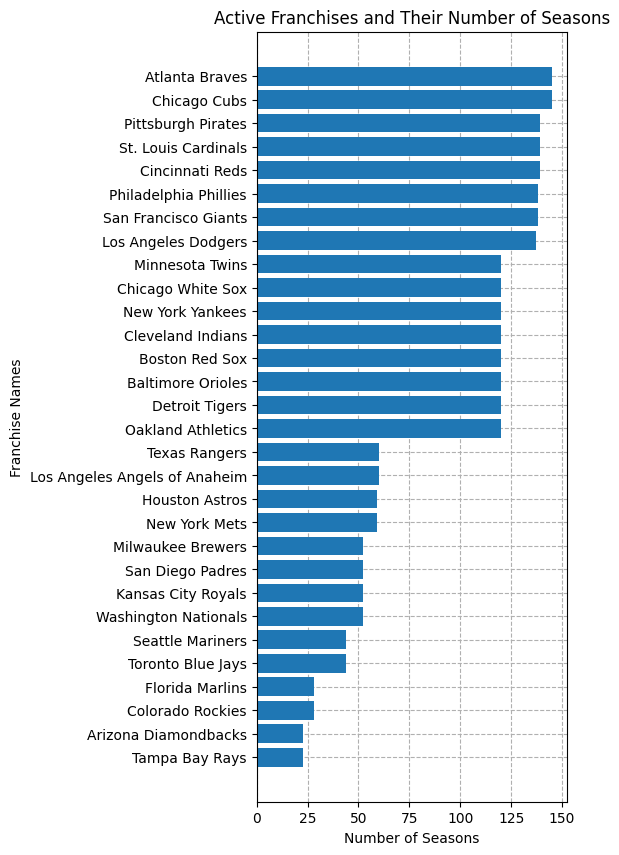

In [0]:
# Selecting axis data
franchise_names = active_y['franchName'][:30] 
seasons = active_y['seasons'][:30]  

# Create a horizontal bar chart
plt.figure(figsize=[4, 10])
plt.barh(franchise_names, seasons, zorder=2)

# Adding labels and title
plt.xlabel('Number of Seasons')
plt.ylabel('Franchise Names')
plt.title('Active Franchises and Their Number of Seasons')

# Adding grid
plt.grid(True, linestyle='--', zorder=1)

# Display the plot
plt.show()

### B.5 – Franchises with Best Win/Loss Ratios

Identifying the 10 franchises who have the best win/loss ratios.

In [0]:
# 10 top franchinse with highest WL ratio
franchise_summary.orderBy(expr('WL_ratio').desc()).limit(10).show()

+--------+---------+----------+---------+-------+---+---+--------+--------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|  W|  L|WL_ratio|          franchName|active|NAassoc|
+--------+---------+----------+---------+-------+---+---+--------+--------------------+------+-------+
|     BNA|        1|      1871|     1875|      5|225| 60|    3.75|Boston Red Stockings|    NA|    ATL|
|     MLU|        1|      1884|     1884|      1|  8|  4|     2.0|   Milwaukee Brewers|     N|   NULL|
|     BRS|        1|      1890|     1891|      2|174| 90|  1.9333|         Boston Reds|     N|   NULL|
|     PNA|        1|      1871|     1875|      5|165| 86|  1.9186|Philadelphia Athl...|    NA|    ATH|
|     COR|        1|      1884|     1884|      1| 69| 36|  1.9167|Cincinnati Outlaw...|     N|   NULL|
|     HAR|        1|      1876|     1877|      2| 78| 48|   1.625| Hartford Dark Blues|     N|    HNA|
|     PRO|        1|      1878|     1885|      8|438|278|  1.5755|    Pro

### B.6 –Win/Loss Ratios in Recent Years

Calculating the win/loss ratio for each of the current franchises during the period since 1998.

In [0]:
# Filtering records since 1998
win_loss_ratio_pandas = (
    teams.filter(expr('yearID >= 1998')) 
    .join(franchises, 'franchID') 
    .filter(expr('active = "Y"'))
    .groupBy('teamID')                
    .agg(
        expr('SUM(W) AS total_wins'),  
        expr('SUM(L) AS total_losses') 
    )
    .withColumn('WL_ratio', expr('ROUND(total_wins / total_losses, 4)')) 
    .orderBy('WL_ratio')    
    .toPandas() 
)


Plotting Horizontal barchat for the results

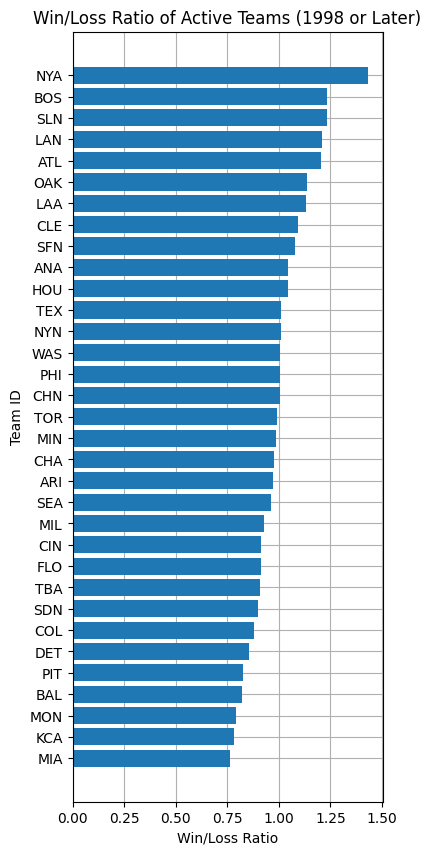

In [0]:
# Set figure
plt.figure(figsize=[4, 10])

# Create a horizontal bar chart
plt.barh(win_loss_ratio_pandas['teamID'], win_loss_ratio_pandas['WL_ratio'], zorder=2)

# Add labels and title
plt.xlabel('Win/Loss Ratio')
plt.ylabel('Team ID')
plt.title('Win/Loss Ratio of Active Teams (1998 or Later)')

# Add a grid
plt.grid(zorder=1)

# Show the plot
plt.show()

## Section C – Batter Statistics

Calculating and exploring certain career statistics for each player who has ever batted in an MLB game.

In [0]:
# Dataframe for players batting
batters = (
  batting.groupBy('playerID')
  .agg(
    expr('SUM(G) as G'),
    expr('SUM(AB) as AB'),
    expr('SUM(H) as H'),
    expr('SUM(2B) as 2B'),
    expr('SUM(3B) as 3B'),
    expr('SUM(HR) as HR'),
    expr('MIN(yearID) as first_year'),
    expr('MAX(yearID) as last_year'),
    expr('COUNT(yearID) as seasons')
  )
  .filter(expr('AB > 0 '))
  .withColumn('BA', expr('ROUND(H / AB, 4)'))
  .withColumn('SP', expr('ROUND((H + 2B + 2*3B + 3*HR) / AB, 4)'))
  .join(people, 'playerID')
  .select('playerID', 'nameFirst', 'nameLast', 'first_year', 'last_year', 'seasons', 'height', 'weight', 'G', 'AB', 'H', '2B', '3B', 'HR', 'BA', 'SP')
)

batters.show(10)



+---------+---------+--------+----------+---------+-------+------+------+----+----+----+---+---+---+------+------+
| playerID|nameFirst|nameLast|first_year|last_year|seasons|height|weight|   G|  AB|   H| 2B| 3B| HR|    BA|    SP|
+---------+---------+--------+----------+---------+-------+------+------+----+----+----+---+---+---+------+------+
|allisdo01|     Doug| Allison|      1871|     1883|     12|    70|   160| 318|1407| 382| 44| 10|  2|0.2715|0.3213|
|orourji01|      Jim|O'Rourke|      1872|     1904|     23|    68|   185|1999|8503|2639|468|149| 62|0.3104|0.4223|
|gilliba01|   Barney|Gilligan|      1879|     1888|     10|    66|   130| 521|1865| 386| 68| 23|  3| 0.207|0.2729|
|neaglja01|     Jack|  Neagle|      1879|     1884|      5|    66|   155| 100| 369|  65| 11|  1|  0|0.1762|0.2114|
|becanbu01|     Buck|Becannon|      1884|     1887|      3|    70|   165|  12|  41|  10|  0|  0|  0|0.2439|0.2439|
|henglmo01|    Moxie|  Hengel|      1884|     1885|      3|    68|   144|  35| 1

 Identifying the 10 batters who have played in the most seasons.

In [0]:
# 10 batters who have played in the most seasons
batters.orderBy('seasons', ascending=False).select('nameFirst', 'nameLast','first_year', 'last_year', 'seasons').show(10)

+---------+---------+----------+---------+-------+
|nameFirst| nameLast|first_year|last_year|seasons|
+---------+---------+----------+---------+-------+
|   Deacon|  McGuire|      1884|     1912|     31|
|   Rickey|Henderson|      1979|     2003|     29|
|     Bobo|   Newsom|      1929|     1953|     29|
|      Jim|     Kaat|      1959|     1983|     28|
|    Tommy|     John|      1963|     1989|     28|
|    Jamie|    Moyer|      1986|     2012|     27|
|    Nolan|     Ryan|      1966|     1993|     27|
|   Harold|   Baines|      1980|     2001|     27|
|      Cap|    Anson|      1871|     1897|     27|
|    Steve|  Carlton|      1965|     1988|     27|
+---------+---------+----------+---------+-------+
only showing top 10 rows



### C.3 – Most At-Bats

Identifying the 10 batters who have had the greatest number of at-bats.

In [0]:
# 10 batters with greatest number os at-bats
batters.orderBy('AB', ascending=False).select('nameFirst', 'nameLast','seasons', 'AB').show(10)

+---------+-----------+-------+-----+
|nameFirst|   nameLast|seasons|   AB|
+---------+-----------+-------+-----+
|     Pete|       Rose|     25|14053|
|     Hank|      Aaron|     23|12364|
|     Carl|Yastrzemski|     23|11988|
|      Cal|     Ripken|     21|11551|
|       Ty|       Cobb|     24|11436|
|    Eddie|     Murray|     23|11336|
|    Derek|      Jeter|     20|11195|
|   Adrian|     Beltre|     21|11068|
|    Robin|      Yount|     20|11008|
|     Dave|   Winfield|     23|11003|
+---------+-----------+-------+-----+
only showing top 10 rows



### C.4 – Highest Batting Average

Identifying the 10 batters who have the highest batting averages. 

In [0]:
# 10 batters who have the highest batting averages. 
batters.filter(batters.AB > 100).select('nameFirst', 'nameLast', 'AB', 'BA').orderBy('BA', ascending=False).show(10)

+------------+---------+-----+------+
|   nameFirst| nameLast|   AB|    BA|
+------------+---------+-----+------+
|          Ty|     Cobb|11436|0.3663|
|        Ross|   Barnes| 2391|0.3597|
|      Rogers|  Hornsby| 8173|0.3585|
|Shoeless Joe|  Jackson| 4981|0.3558|
|        Levi|  Meyerle| 1443|0.3555|
|       Steve|     King|  272|0.3529|
|       Lefty|   O'Doul| 3264|0.3493|
|      George|    Nicol|  147|0.3469|
|          Ed|Delahanty| 7510|0.3458|
|         Cal|    McVey| 2513|0.3458|
+------------+---------+-----+------+
only showing top 10 rows



### C.5 – Highest Slugging Percentage

Identifying the 10 batters who have the slugging percentages.

In [0]:
# 10 batters who have the slugging percentages.
batters.filter(batters.AB > 100).select('nameFirst', 'nameLast', 'AB', 'SP').orderBy('SP', ascending=False).show(10)

+---------+---------+----+------+
|nameFirst| nameLast|  AB|    SP|
+---------+---------+----+------+
|     Babe|     Ruth|8398|0.6898|
|   Yordan|  Alvarez| 321|0.6542|
|    Edwin|     Rios| 123|0.6341|
|      Ted| Williams|7706|0.6338|
|      Lou|   Gehrig|8001|0.6324|
|   Jimmie|     Foxx|8134|0.6093|
|    Barry|    Bonds|9847|0.6069|
|     Hank|Greenberg|5193| 0.605|
|     Mark|  McGwire|6187|0.5882|
|    Manny|  Ramirez|8244|0.5854|
+---------+---------+----+------+
only showing top 10 rows



### C.6 – Relationship between Batting Average and Slugging Percentage

Graphically exploring the relationship between batting average and slugging percentage.

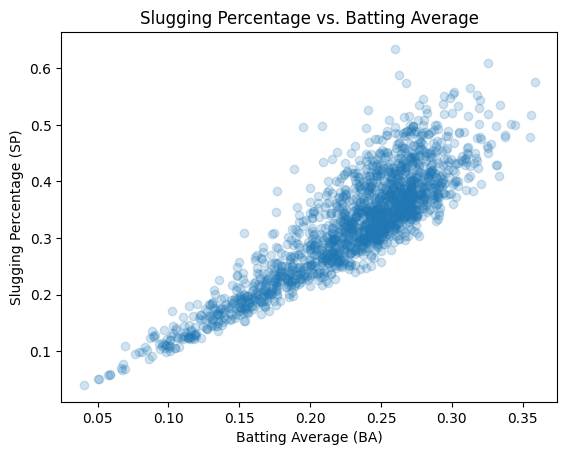

In [0]:
# Sample 20% of the data from the batters DataFrame.
batters_pandas = (
  batters.sample(withReplacement=False, fraction=0.2, seed=1).filter(batters.AB > 100)
).toPandas()

# Scatterplot of the sampled data with 0.2 alpha.
plt.scatter(batters_pandas['BA'], batters_pandas['SP'], alpha=0.2)

# Set axis labels and title
plt.xlabel('Batting Average (BA)')
plt.ylabel('Slugging Percentage (SP)')
plt.title('Slugging Percentage vs. Batting Average')

# Show the plot
plt.show()


### Section D – Trends over Time

### D.1 – Calculating Averages by Year

Exploring how certain statistics have changed during the history of the MLB.

In [0]:
from pyspark.sql import functions as F
# DataFrame by year
by_year = (
    batting.join(people, on='playerID') 
    .groupBy('yearID') 
    .agg(
        F.avg('weight').alias('avg_wt'),
        F.avg('height').alias('avg_ht'), 
        F.sum('AB').alias('AB'),  
        F.sum('H').alias('H'),  
        F.sum('2B').alias('2B'), 
        F.sum('3B').alias('3B'),
        F.sum('HR').alias('HR') 
    )
    .withColumn('BA', F.round(F.col('H') / F.col('AB'), 4))
    .withColumn('SP', F.round((F.col('H') + 2 * F.col('2B') + 3 * F.col('3B') + 4 * F.col('HR')) / F.col('AB'), 4))  
    .orderBy('yearID') 
).toPandas()

# Display head of the DataFrame
display(by_year.head())


yearID,avg_wt,avg_ht,AB,H,2B,3B,HR,BA,SP
1871,157.04950495049505,68.50980392156863,10822,3101,434,239,47,0.2865,0.4504
1872,159.84745762711864,68.53333333333333,15665,4467,581,145,37,0.2852,0.3966
1873,160.23655913978496,68.61290322580645,16959,4926,570,211,47,0.2905,0.4061
1874,161.0752688172043,68.58241758241758,19104,5224,634,194,40,0.2735,0.3787
1875,162.2694610778443,68.72560975609755,26833,6812,839,273,40,0.2539,0.3529


### D.2 – Trends for Height and Weight

 Graphically exploring the trends for player height and weight over time.

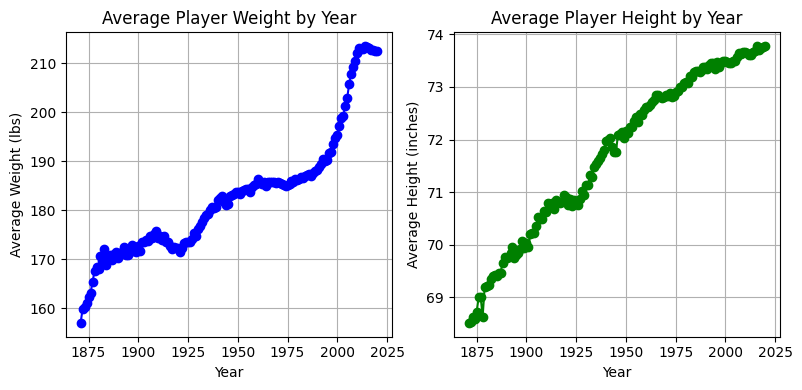

In [0]:
# Plots of average player weight and height by year

# Create a figure
plt.figure(figsize=[8, 4])

# first subplot for average player weight
plt.subplot(1, 2, 1)
plt.plot(by_year['yearID'], by_year['avg_wt'], marker='o', color='blue')
plt.title('Average Player Weight by Year')
plt.xlabel('Year')
plt.ylabel('Average Weight (lbs)')
plt.grid()

# second subplot for average player height
plt.subplot(1, 2, 2)  
plt.plot(by_year['yearID'], by_year['avg_ht'], marker='o', color='green')
plt.title('Average Player Height by Year')
plt.xlabel('Year')
plt.ylabel('Average Height (inches)')
plt.grid()

# Adding layout
plt.tight_layout()

# Show the figure
plt.show()

### D.3 – Trends for Batting Statistics

Graphically exploring the trends for batting average and slugging percentage over time.


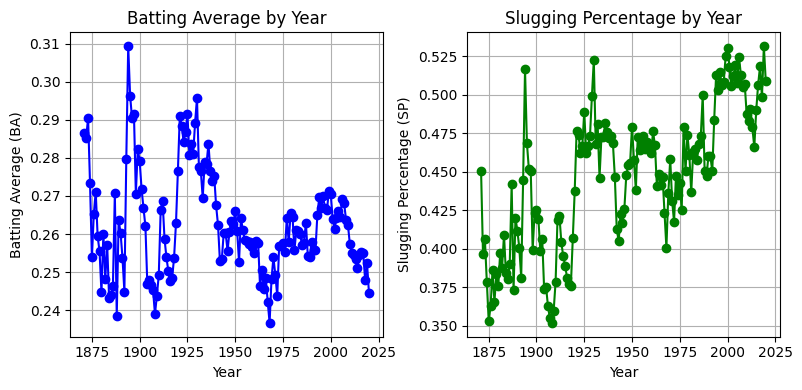

In [0]:
# Set the figure size
plt.figure(figsize=[8, 4])

# first subplot for batting average (BA)
plt.subplot(1, 2, 1)
plt.plot(by_year['yearID'], by_year['BA'], marker='o', color='blue')
plt.title('Batting Average by Year')
plt.xlabel('Year')
plt.ylabel('Batting Average (BA)')
plt.grid()

# second subplot for slugging percentage (SP)
plt.subplot(1, 2, 2) 
plt.plot(by_year['yearID'], by_year['SP'], marker='o', color='green')
plt.title('Slugging Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Slugging Percentage (SP)')
plt.grid()

# Adding layout
plt.tight_layout()

# Show the figure
plt.show()

### D.4 – Trends for American and National Leagues

Exploring trends in American and Nation Leagues

In [0]:
# DataFrame by year and league
by_year_and_league = (
    batting.join(people, on='playerID')
    .filter(F.col('yearID') >= 1960) 
    .groupBy('yearID', 'lgID') 
    .agg(
        F.avg('weight').alias('avg_wt'),
        F.avg('height').alias('avg_ht'),
        F.sum('AB').alias('AB'),
        F.sum('H').alias('H'),
        F.sum('2B').alias('2B'),
        F.sum('3B').alias('3B'),
        F.sum('HR').alias('HR')
    )
    .withColumn('BA', F.round(F.col('H') / F.col('AB'), 4))
    .withColumn('SP', F.round((F.col('H') + 2 * F.col('2B') + 3 * F.col('3B') + 4 * F.col('HR')) / F.col('AB'), 4))
    .orderBy('yearID', 'lgID')  
).toPandas()


Creating a Dataframe for Amrican and National leagues

In [0]:
# DataFrame for each league
AL = by_year_and_league[by_year_and_league['lgID'] == 'AL']
NL = by_year_and_league[by_year_and_league['lgID'] == 'NL']



Graphically exploring trends in American and National leagues

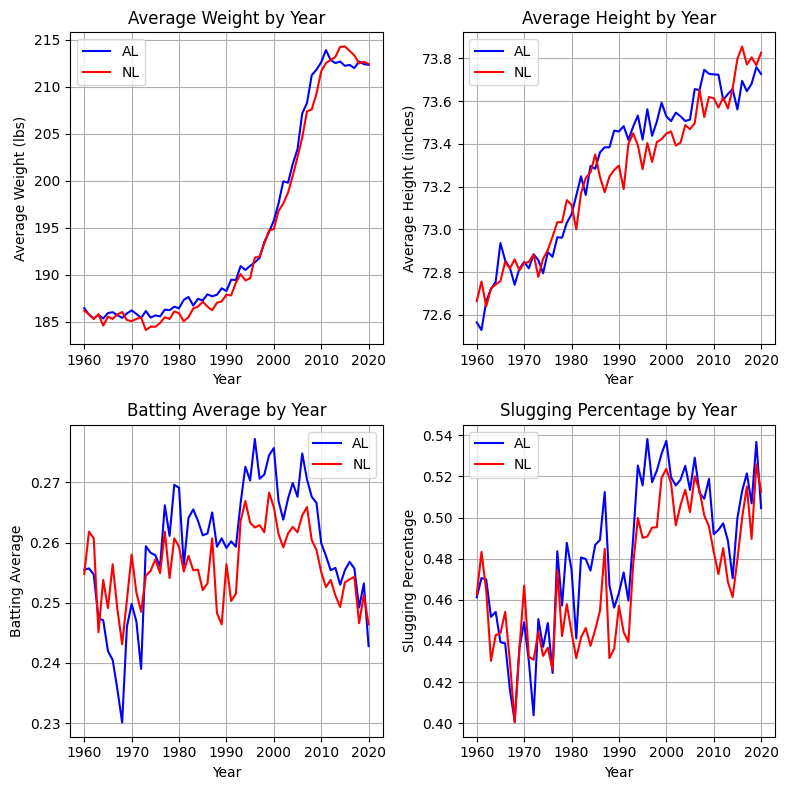

In [0]:
# Line plots for average weight, average height, batting average, and slugging percentage by year

# Setting the figure size
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Upper left: Line plot for average weight by year (AL and NL)
axes[0, 0].plot(AL['yearID'], AL['avg_wt'], label='AL', color='blue')
axes[0, 0].plot(NL['yearID'], NL['avg_wt'], label='NL', color='red')
axes[0, 0].set_title('Average Weight by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Average Weight (lbs)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Upper right: Line plot for average height by year (AL and NL)
axes[0, 1].plot(AL['yearID'], AL['avg_ht'], label='AL', color='blue')
axes[0, 1].plot(NL['yearID'], NL['avg_ht'], label='NL', color='red')
axes[0, 1].set_title('Average Height by Year')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Height (inches)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Bottom left: Line plot for batting average by year (AL and NL)
axes[1, 0].plot(AL['yearID'], AL['BA'], label='AL', color='blue')
axes[1, 0].plot(NL['yearID'], NL['BA'], label='NL', color='red')
axes[1, 0].set_title('Batting Average by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Batting Average')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Bottom right: Line plot for slugging percentage by year (AL and NL)
axes[1, 1].plot(AL['yearID'], AL['SP'], label='AL', color='blue')
axes[1, 1].plot(NL['yearID'], NL['SP'], label='NL', color='red')
axes[1, 1].set_title('Slugging Percentage by Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Slugging Percentage')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adding layout
plt.tight_layout()

# Display the figure
plt.show()

### D.5 – Average Number of Games

Determining the average number of games played by each team during each MLB season.

In [0]:
# Creating games_per_season Dataframe
games_per_season = (
  teams.groupBy('yearID')
  .agg(
    expr('SUM(G) as G'),
    expr('count(distinct(franchID)) as num_franch')
  )
  .withColumn('avg_games', expr('ROUND(G / num_franch, 1)'))
  .orderBy('yearID')
).toPandas()

# Display head of games_per_season
display(games_per_season.head())

yearID,G,num_franch,avg_games
1871,254,9,28.2
1872,366,11,33.3
1873,398,9,44.2
1874,464,8,58.0
1875,690,13,53.1


Graphically exploring average number of Games

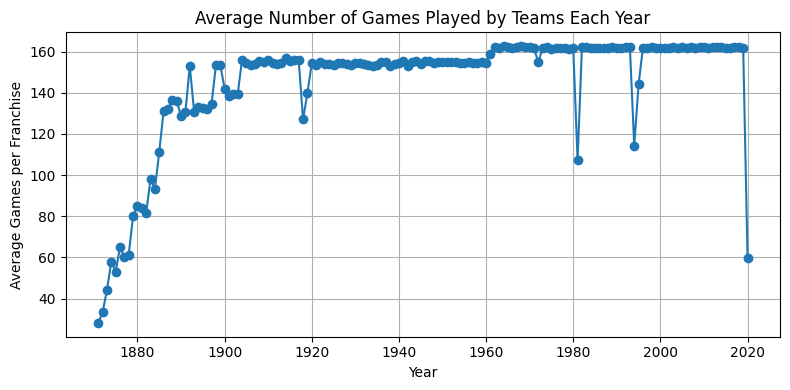

In [0]:
# plot displaying the average number of games played by teams during each year

# figure size
plt.figure(figsize=[8, 4])

# Plotting the data
plt.plot(games_per_season['yearID'], games_per_season['avg_games'], marker='o')

# Add title and labels
plt.title('Average Number of Games Played by Teams Each Year')
plt.xlabel('Year')
plt.ylabel('Average Games per Franchise')

# Adding grid
plt.grid(True)

# Displaying plot
plt.tight_layout()
plt.show()

## Section E – Topic of Your Choice

Exploring managers with awards

In [0]:
# Loading the awards_managers Dataframe
awards_managers = (
    spark.read
    .option("header", True)  
    .option("inferSchema", True)
    .option("delimiter", ",")     
    .csv('/FileStore/tables/lahman/AwardsManagers.csv')    
)

awards_managers.printSchema()


root
 |-- playerID: string (nullable = true)
 |-- awardID: string (nullable = true)
 |-- yearID: integer (nullable = true)
 |-- lgID: string (nullable = true)
 |-- tie: string (nullable = true)
 |-- notes: string (nullable = true)



In [0]:
# Selecting 10 managers with the most awards
top_10_managers = (
    awards_managers
    .groupBy('playerID')
    .count()
    .join(
        people.select('playerID', 'nameFirst', 'nameLast'),
        on='playerID',
        how='inner'
    )
    .withColumn(
        'full_name',
        F.concat_ws(' ', F.col('nameFirst'), F.col('nameLast'))
    )
    .orderBy('count', ascending=False)
    .select('full_name', 'count')
    .limit(10)
)

# Show the result
top_10_managers.show()

+--------------+-----+
|     full_name|count|
+--------------+-----+
|     Bobby Cox|   12|
|  Tony LaRussa|    7|
|   Jim Leyland|    7|
|Buck Showalter|    6|
|   Dusty Baker|    5|
|    Joe Maddon|    5|
| Davey Johnson|    4|
|  Lou Piniella|    4|
| Mike Scioscia|    4|
|  Joe McCarthy|    3|
+--------------+-----+



Graphically analyzing managers awards

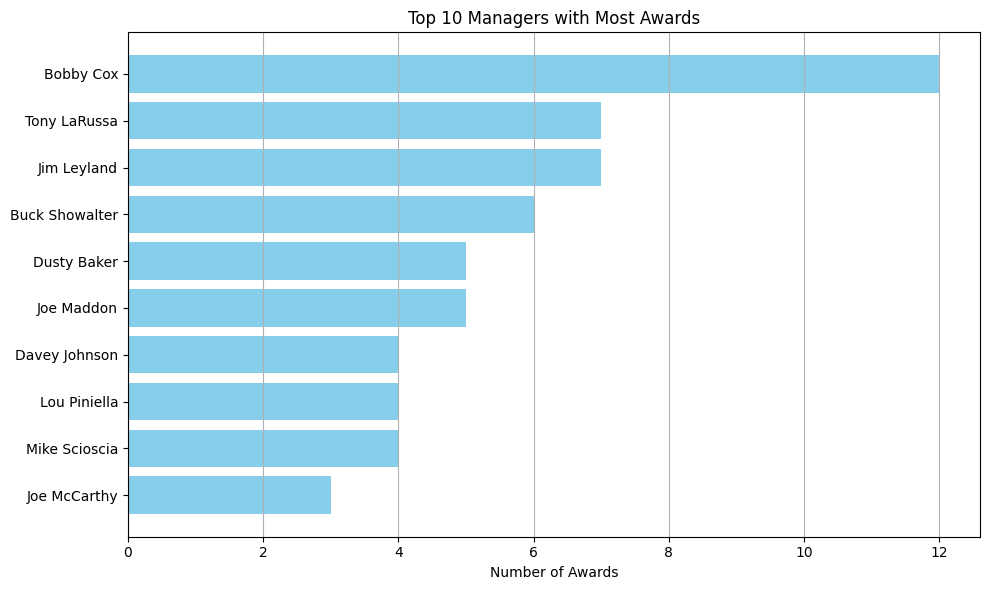

In [0]:
top_10_managers_data = top_10_managers.toPandas()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_managers_data['full_name'], top_10_managers_data['count'], color='skyblue')
plt.xlabel('Number of Awards')
plt.title('Top 10 Managers with Most Awards')
plt.gca().invert_yaxis()
plt.grid(axis='x')  
plt.tight_layout()
plt.show()

## Section F – Topic of Your Choice

Analyzing managers performance

In [0]:
# Loading managers data
managers = (
    spark.read
    .option("header", True)  
    .option("inferSchema", True)
    .option("delimiter", ",")     
    .csv('/FileStore/tables/lahman/Managers.csv')    
)

managers.printSchema()

root
 |-- playerID: string (nullable = true)
 |-- yearID: integer (nullable = true)
 |-- teamID: string (nullable = true)
 |-- lgID: string (nullable = true)
 |-- inseason: integer (nullable = true)
 |-- G: integer (nullable = true)
 |-- W: integer (nullable = true)
 |-- L: integer (nullable = true)
 |-- rank: integer (nullable = true)
 |-- plyrMgr: string (nullable = true)



In [0]:
# Displaying the first 10 rows
managers.show(10)

+---------+------+------+----+--------+---+---+---+----+-------+
| playerID|yearID|teamID|lgID|inseason|  G|  W|  L|rank|plyrMgr|
+---------+------+------+----+--------+---+---+---+----+-------+
|wrighha01|  1871|   BS1|  NA|       1| 31| 20| 10|   3|      Y|
| woodji01|  1871|   CH1|  NA|       1| 28| 19|  9|   2|      Y|
|paborch01|  1871|   CL1|  NA|       1| 29| 10| 19|   8|      Y|
|lennobi01|  1871|   FW1|  NA|       1| 14|  5|  9|   8|      Y|
|deaneha01|  1871|   FW1|  NA|       2|  5|  2|  3|   8|      Y|
|fergubo01|  1871|   NY2|  NA|       1| 33| 16| 17|   5|      Y|
|mcbridi01|  1871|   PH1|  NA|       1| 28| 21|  7|   1|      Y|
|hastisc01|  1871|   RC1|  NA|       1| 25|  4| 21|   9|      Y|
| pikeli01|  1871|   TRO|  NA|       1|  4|  1|  3|   6|      Y|
|cravebi01|  1871|   TRO|  NA|       2| 25| 12| 12|   6|      Y|
+---------+------+------+----+--------+---+---+---+----+-------+
only showing top 10 rows



In [0]:
# Joining the awards_managers and managers DataFrames
manager_performance = (
    awards_managers
    .join(managers, on='playerID', how='inner')
)

# Show the resulting DataFrame
manager_performance.show()

+---------+--------------------+------+----+----+-----+------+------+----+--------+---+---+---+----+-------+
| playerID|             awardID|yearID|lgID| tie|notes|yearID|teamID|lgID|inseason|  G|  W|  L|rank|plyrMgr|
+---------+--------------------+------+----+----+-----+------+------+----+--------+---+---+---+----+-------+
|mckecbi01|TSN Manager of th...|  1940|  ML|NULL| NULL|  1915|   NEW|  FL|       2|102| 54| 45|   5|      Y|
|mckecbi01|TSN Manager of th...|  1937|  ML|NULL| NULL|  1915|   NEW|  FL|       2|102| 54| 45|   5|      Y|
|mckecbi01|TSN Manager of th...|  1940|  ML|NULL| NULL|  1922|   PIT|  NL|       2| 90| 53| 36|   3|      N|
|mckecbi01|TSN Manager of th...|  1937|  ML|NULL| NULL|  1922|   PIT|  NL|       2| 90| 53| 36|   3|      N|
|mckecbi01|TSN Manager of th...|  1940|  ML|NULL| NULL|  1923|   PIT|  NL|       1|154| 87| 67|   3|      N|
|mckecbi01|TSN Manager of th...|  1937|  ML|NULL| NULL|  1923|   PIT|  NL|       1|154| 87| 67|   3|      N|
|harribu01|TSN Mana

Analyzing winning percentage of top 10 managers

In [0]:
# Calculating 10 top managers by the percentage of awards won 
manager_performance = (
    manager_performance
    .withColumn('WPct', F.round(F.col('W') / (F.col('W') + F.col('L')), 4))
    .orderBy('WPct', ascending=False)
)

# Show the DataFrame with the new WPct column
manager_performance.show(10)


+---------+--------------------+------+----+----+-----+------+------+----+--------+---+---+---+----+-------+------+
| playerID|             awardID|yearID|lgID| tie|notes|yearID|teamID|lgID|inseason|  G|  W|  L|rank|plyrMgr|  WPct|
+---------+--------------------+------+----+----+-----+------+------+----+--------+---+---+---+----+-------+------+
|stanked01|TSN Manager of th...|  1952|  ML|NULL| NULL|  1977|   TEX|  AL|       2|  1|  1|  0|   2|      N|   1.0|
|roberda07|BBWAA Manager of ...|  2016|  NL|NULL| NULL|  2020|   LAN|  NL|       1| 60| 43| 17|   1|      N|0.7167|
|pinielo01|BBWAA Manager of ...|  1995|  AL|NULL| NULL|  2001|   SEA|  AL|       1|162|116| 46|   1|      N| 0.716|
|pinielo01|BBWAA Manager of ...|  2001|  AL|NULL| NULL|  2001|   SEA|  AL|       1|162|116| 46|   1|      N| 0.716|
|pinielo01|TSN Manager of th...|  2001|  AL|NULL| NULL|  2001|   SEA|  AL|       1|162|116| 46|   1|      N| 0.716|
|pinielo01|BBWAA Manager of ...|  2008|  NL|NULL| NULL|  2001|   SEA|  A

Analyzing how winning percentages correlate with the number of awards received.

In [0]:
# Aggregate to get total awards, wins, losses, and WPct for each manager
manager_agg = (
    manager_performance
    .groupBy('playerID')
    .agg(
        F.count('awardID').alias('total_awards'),
        F.sum('W').alias('total_wins'),
        F.sum('L').alias('total_losses'),
        F.round(F.avg('WPct'), 2).alias('avg_WPct')
    )
)

# Show the aggregated results
manager_agg.show()

+---------+------------+----------+------------+--------+
| playerID|total_awards|total_wins|total_losses|avg_WPct|
+---------+------------+----------+------------+--------+
|  coxbo01|         348|     30048|       24012|    0.55|
|ozarkda99|           8|       618|         542|    0.52|
|zimmedo01|          26|      1770|        1716|     0.5|
|durocle01|          78|      6024|        5127|    0.54|
|mauchge01|          26|      1902|        2037|    0.48|
|hurdlcl01|          34|      2538|        2690|    0.48|
|tebbebi01|          11|       748|         705|    0.51|
|hargrmi01|          16|      1188|        1173|     0.5|
|blackbu02|          26|      1848|        1968|    0.48|
|gardero01|          48|      3600|        3840|    0.48|
|mckeoja99|          32|      2102|        1980|    0.51|
|larusto01|         238|     19096|       16555|    0.53|
| dyered01|           5|       446|         325|    0.58|
|martibi02|          18|      1253|        1013|    0.55|
|tannech01|   

Graphically analyzing the average winning percentage of managers and the total number of awards they have received.

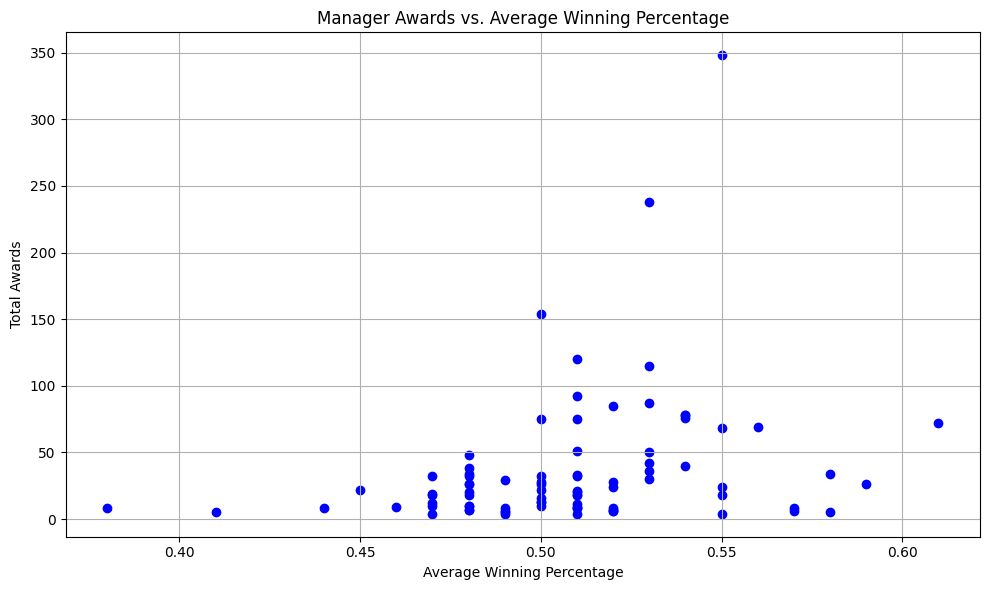

In [0]:
manager_agg_df = manager_agg.toPandas()

# Scatter plot of total awards vs. average winning percentage
plt.figure(figsize=(10, 6))
plt.scatter(manager_agg_df['avg_WPct'], manager_agg_df['total_awards'], color='blue')
plt.title('Manager Awards vs. Average Winning Percentage')
plt.xlabel('Average Winning Percentage')
plt.ylabel('Total Awards')
plt.grid() 
plt.tight_layout()  
plt.show()